In [19]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv('WA_Marketing-Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [22]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [23]:
df['MarketID'].nunique()

10

In [24]:
df['MarketSize'].value_counts()

MarketSize
Medium    320
Large     168
Small      60
Name: count, dtype: int64

In [25]:
df['Promotion'].value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

In [26]:
df['LocationID'].nunique()

137

In [27]:
df[(df['MarketID'])==1]

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


|변수|정의|설명|분류|타입|
|---|---|---|---|---|
|MarketID|마켓 아이디|시장을 식별하는 고유 식별자 (1~10)|범주형|문자열|
|MarketSize|마켓 크기|마켓의 크기 (Small, Medium, Large)|범주형|문자열|
|LocationID|위치 아이디|매장 위치를 ​​식별하는 고유 식별자 (1~920 / 137개)|범주형|문자열|
|AgeOfStore|매장 연령|매장이 오픈한지 몇 년이 지났는 지|연속형|정수|
|Promotion|프로모션|진행한 프로모션의 종류 (1~3)|범주형|문자열|
|week|주차|프로모션이 진행된 4주 중 한 주 (1~4)|범주형|정수|
|SalesInThousands|매출액(K)|특정 LocationID , 프로모션 및 주차별 매출액(천 단위)|연속형|실수|

# 데이터 전처리

## 이상치 처리

SalesInThousands
17.34    1
19.26    1
22.18    1
23.35    1
23.44    1
        ..
96.01    1
96.48    1
97.61    1
99.12    1
99.65    1
Name: count, Length: 517, dtype: int64


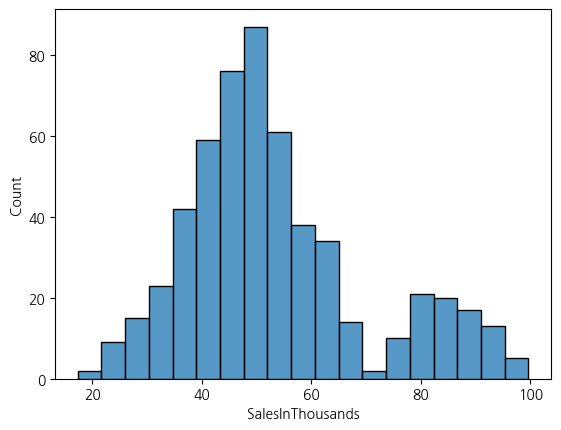

In [28]:
print(df['SalesInThousands'].value_counts().sort_index())
sns.histplot(data=df, x='SalesInThousands', fill=True)
plt.show()


# 데이터 시각화

In [29]:
summary_df = df.groupby('Promotion').agg({
    'MarketSize': [('Small_cnt', lambda x: (x == 'Small').sum()), ('Medium', lambda x: (x == 'Medium').sum()), ('Large', lambda x: (x == 'Large').sum())],
    'LocationID': [('LocationID_Count', 'nunique')],
    'AgeOfStore': [('Age_mean', 'mean'), ('Age_std', 'std')],
    'week': [('1_cnt', lambda x: (x==1).sum()),('2_cnt', lambda x: (x==2).sum()),('3_cnt', lambda x: (x==3).sum()),('4_cnt', lambda x: (x==4).sum())],
    'SalesInThousands': [('Sales_mean', 'mean'), ('Sales_std', 'std')]
})

summary_df

MarketSize                    LocationID AgeOfStore            week  \
           Small_cnt Medium Large LocationID_Count   Age_mean   Age_std 1_cnt   
Promotion                                                                       
1                 20     96    56               43   8.279070  6.636160    43   
2                 16    108    64               47   7.978723  6.597648    47   
3                 24    116    48               47   9.234043  6.651646    47   

                            SalesInThousands             
          2_cnt 3_cnt 4_cnt       Sales_mean  Sales_std  
Promotion                                                
1            43    43    43        58.099012  16.553782  
2            47    47    47        47.329415  15.108955  
3            47    47    47        55.364468  16.766231

# 정규성, 등분산성 분석

In [30]:
from scipy.stats import shapiro      # 정규성
from scipy.stats import levene       # 등분산성
from statsmodels.formula.api import ols

In [31]:
groups = [
    df.loc[df['Promotion'] == 1, 'SalesInThousands'],
    df.loc[df['Promotion'] == 2, 'SalesInThousands'],
    df.loc[df['Promotion'] == 3, 'SalesInThousands']
]

for i, group in enumerate(groups):
    print(f'Promotion {i+1}')
    stat, p = shapiro(group)
    print(f'stat: {stat:0.4f}\np: {p:0.4f}')
    if p > 0.05:
        print('정규성 만족\n')
    else:
        print('정규성 만족하지 않음\n')

# stat이 1에 가까울수록 정규성 만족
# p-value가 0.05보다 작으므로 귀무가설 기각 -> 정규성 만족하지 않음

Promotion 1
stat: 0.9153
p: 0.0000
정규성 만족하지 않음

Promotion 2
stat: 0.9145
p: 0.0000
정규성 만족하지 않음

Promotion 3
stat: 0.9208
p: 0.0000
정규성 만족하지 않음



In [32]:
groups = [
    df.loc[df['Promotion'] == 1, 'SalesInThousands'],
    df.loc[df['Promotion'] == 2, 'SalesInThousands'],
    df.loc[df['Promotion'] == 3, 'SalesInThousands']
]

stat, p = levene(*groups)
print(f'stat: {stat:0.4f}\np: {p:0.4f}')
if p > 0.05:
    print('등분산성 만족')
else:
    print('등분산성 만족하지 않음')
# p-value가 0.05보다 크므로 귀무가설 채택 -> 등분산성 만족

stat: 1.2697
p: 0.2818
등분산성 만족


# LMM 분석

## Promotion * week 상호작용 모형

In [33]:
import statsmodels.formula.api as smf

# LMM 모델 설계
# 1. 고정 효과: Promotion, Week, AgeOfStore (그리고 Promotion과 Week의 상호작용)
# 2. 변량 효과 (groups): LocationID (Location은 MarketID에 포함되므로 보통 하위 단위를 그룹으로 잡음)

model = smf.mixedlm("SalesInThousands ~ C(Promotion) * week + AgeOfStore + C(MarketSize)", 
                    data=df, 
                    groups=df["LocationID"])

result = model.fit()
print(result.summary())

                Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   SalesInThousands
No. Observations:     548       Method:               REML            
No. Groups:           137       Scale:                26.5173         
Min. group size:      4         Log-Likelihood:       -1852.3567      
Max. group size:      4         Converged:            Yes             
Mean group size:      4.0                                             
----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------
Intercept                73.400    2.364  31.049 0.000  68.767  78.033
C(Promotion)[T.2]        -9.088    2.452  -3.706 0.000 -13.895  -4.281
C(Promotion)[T.3]         0.248    2.457   0.101 0.919  -4.566   5.063
C(MarketSize)[T.Medium] -26.633    1.938 -13.742 0.000 -30.431 -22.834
C(MarketSize)[T.Small] 

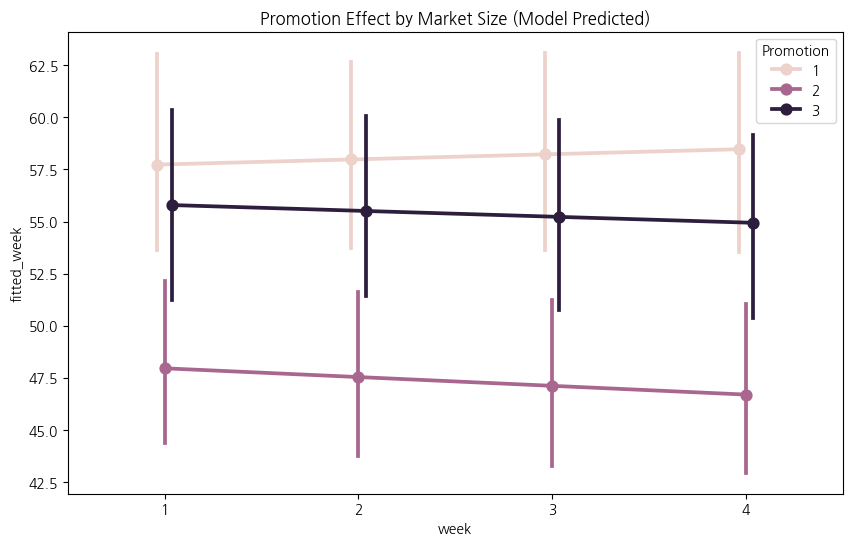

In [34]:
df['fitted_week'] = result.fittedvalues

# 시각화: seaborn의 pointplot은 평균값과 신뢰구간을 자동으로 그려줍니다.

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='week', y='fitted_week', hue='Promotion', dodge=True)
plt.title("Promotion Effect by Market Size (Model Predicted)")
plt.show()

In [35]:
result.summary().tables[1].to_csv('model_week.csv')

## Promotion * MarketSize 상호작용 모형

In [36]:
import statsmodels.formula.api as smf

# LMM 모델 설계
# 1. 고정 효과: Promotion, Week, AgeOfStore (그리고 Promotion과 Week의 상호작용)
# 2. 변량 효과 (groups): LocationID (Location은 MarketID에 포함되므로 보통 하위 단위를 그룹으로 잡음)

model = smf.mixedlm("SalesInThousands ~ C(Promotion) * C(MarketSize) + AgeOfStore + week", 
                    data=df, 
                    groups=df["LocationID"])

result = model.fit()
print(result.summary())

                         Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         SalesInThousands
No. Observations:          548             Method:                     REML            
No. Groups:                137             Scale:                      26.5217         
Min. group size:           4               Log-Likelihood:             -1840.4831      
Max. group size:           4               Converged:                  Yes             
Mean group size:           4.0                                                         
---------------------------------------------------------------------------------------
                                           Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------------------
Intercept                                  75.009    2.832 26.489 0.000  69.459  80.560
C(Promotion)[T.2]                         -15.195    3.68

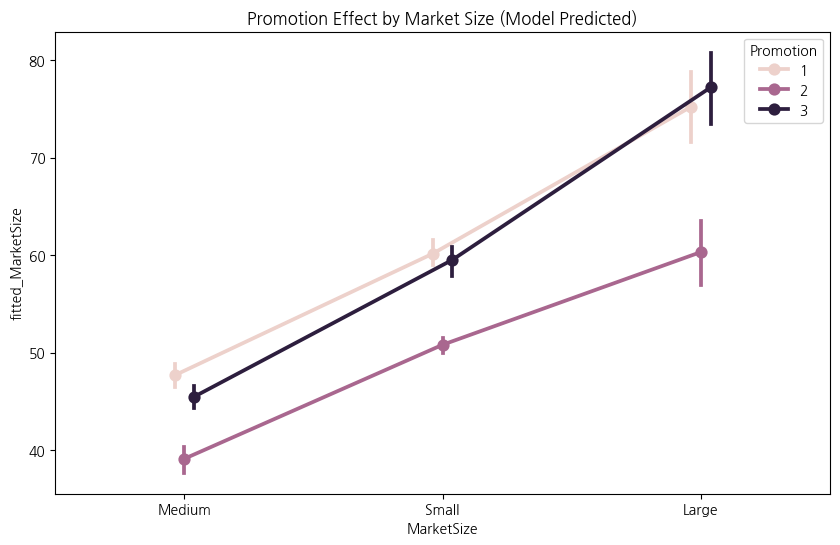

In [37]:
df['fitted_MarketSize'] = result.fittedvalues

# 시각화: seaborn의 pointplot은 평균값과 신뢰구간을 자동으로 그려줍니다.

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='MarketSize', y='fitted_MarketSize', hue='Promotion', dodge=True)
plt.title("Promotion Effect by Market Size (Model Predicted)")
plt.show()

In [38]:
result.summary().tables[1].to_csv('model_MarketSize.csv')

In [39]:
import statsmodels.formula.api as smf

# LMM 모델 설계
# 1. 고정 효과: Promotion, Week, AgeOfStore (그리고 Promotion과 Week의 상호작용)
# 2. 변량 효과 (groups): LocationID (Location은 MarketID에 포함되므로 보통 하위 단위를 그룹으로 잡음)

model = smf.mixedlm("SalesInThousands ~ C(Promotion) * C(MarketID) + AgeOfStore + week", 
                    data=df, groups=df["LocationID"])

result = model.fit()
print(result.summary())

LinAlgError: Singular matrix

In [40]:
# 0이 있는 조합이 있다면 그게 범인입니다!
print(pd.crosstab(df['MarketID'], df['Promotion']))

Promotion   1   2   3
MarketID             
1          20  20  12
2           4   0  20
3          28  24  36
4          16  16   4
5           8  32  20
6          20  24  16
7          16  16  28
8          20   8  20
9          12   8  20
10         28  40  12


In [ ]:
df = df[df['MarketID'] != 2]

In [24]:
import statsmodels.formula.api as smf

# LMM 모델 설계
# 1. 고정 효과: Promotion, Week, AgeOfStore (그리고 Promotion과 Week의 상호작용)
# 2. 변량 효과 (groups): LocationID (Location은 MarketID에 포함되므로 보통 하위 단위를 그룹으로 잡음)

model = smf.mixedlm("SalesInThousands ~ C(Promotion) * C(MarketID)", 
                    data=df, groups=df["LocationID"])

result = model.fit(maxiter=10000, method='powell')
print(result.summary())

                     Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       SalesInThousands
No. Observations:       524           Method:                   REML            
No. Groups:             131           Scale:                    27.1140         
Min. group size:        4             Log-Likelihood:           -1564.8918      
Max. group size:        4             Converged:                Yes             
Mean group size:        4.0                                                     
--------------------------------------------------------------------------------
                                     Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                            40.719    1.177 34.599 0.000  38.412 43.026
C(Promotion)[T.2]                   -10.567    1.664 -6.349 0.000 -13.829 -7.305
C(Promotion)[T.3]                    -6.730    1.9

C:\Users\songj\AppData\Local\Temp\ipykernel_13508\2114731818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fitted_MarketID'] = result.fittedvalues


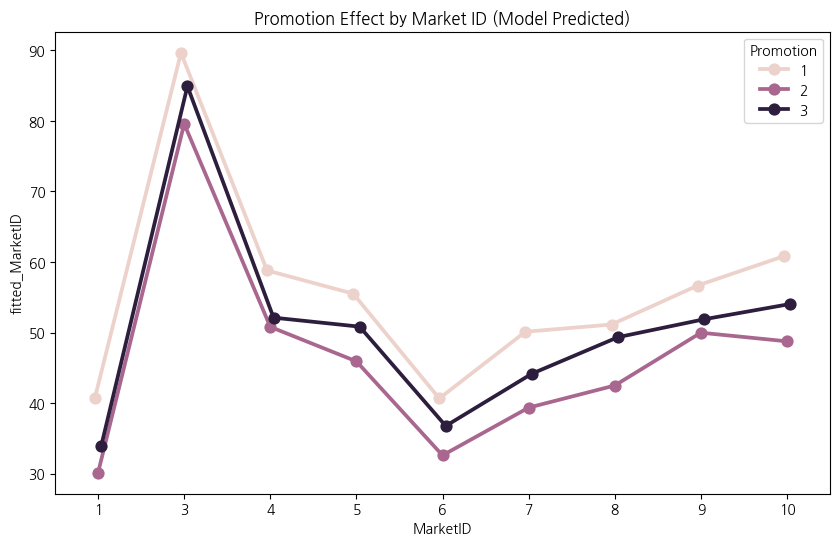

In [25]:
df['fitted_MarketID'] = result.fittedvalues

# 시각화: seaborn의 pointplot은 평균값과 신뢰구간을 자동으로 그려줍니다.

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='MarketID', y='fitted_MarketID', hue='Promotion', dodge=True)
plt.title("Promotion Effect by Market ID (Model Predicted)")
plt.show()

In [ ]:
result.summary().tables[1].to_csv('model_MarketID.csv')

In [32]:
copy_df = df[['MarketID','LocationID','week','fitted_MarketID','fitted_MarketSize','fitted_week']]

In [33]:
copy_df.to_csv('lmm_all_results.csv', index=False, encoding='utf-8-sig')